# Introduction to Akori Web Proyect Dataset Analysis

## Contents
* [Abstract](#abstract)
* [Dataset](#dataset)
	- [Experimental Protocol](#experiment)
	- [Subjects](#age_gender)
* [Heatmap](#heatmap)
* [Salience Map](#salience)
	- [Pre-trained Performance](#pretrained)
	- [Trained Performance](#trained)
* [Spacial Bias](#spacial_bias)
* [Optimized Performance](#optimized)
* [Conclusions](#conclusions)
* [References](#references)

<a id='abstract'></a>
## Abstract
### Intro and presentation of challenge
When the cognitive mechanisms that affect attention in the human brain are studied, the eye-movement behaviour is a good source of information to research it's process given that the visual pathways in the brain have been amply studied. When characterizing which processes influence attentional behaviour, these can be represented through what is called a salience model, where three principal sub-processes are often presented: bottom-up influence contains elements which relate to pre-attentional stimulus and inherently present in the image. Top-down influence is the container of attentional influences that are considered high-level processing by the brain and finally, a spacial inhibitory influence needed to reward the exploring of new areas in the visual field. Bottom-up influence has been the most studied because of it's direct relation to visual cortical areas that process colour, light, orientation, etc. Leaving top-down influence and inhibitory patterns as a compliment to encapsulate behaviours which are poorly explained as a bias. This approach doesn't allow a complete understanding of many human tasks and is only effective for very basic experiments; Given a certain task, how can we distinguish possible top-down channels which are more relevant when characterizing eye-movement and thus attention? Answering this question helps us achieve a better performing model and also give insight of other neuronal pathways that may modulate attention. 

### Solution proposal and expectations
For this study a method is proposed to explore top-down influence channels specifically using a human free-viewing experiment in a web-page environment. First, given that humans are highly trained by every-day life in web-exploring, we expected a high top-down bias in their behaviour (poor prediction with bottom-up models like Itti-Koch). Second, we expected to discern which top-down patterns are influencing the most in this task in particular. Finally, a mathematical method to apply this work to other tasks is established, which allows to further develop theory in how both bottom-up and top-down patterns interact and is processed in the human brain. 

### Results and conclusions
Using *Natural Scanpath Saliency* (NSS) as performance metric, we found that a pre-trained neural network algorithm (<a href="https://github.com/marcellacornia/sam" target="_blank">LSTM-based Saliency Attentive Model</a>) already performs better than a trained Itti-Koch model, with $NSS_{pre}=1.28$ where usually $NSS_{itti} \approx 1.06$ (according to <a href="http://saliency.mit.edu/results_cat2000.html" target="_blank">MIT Database</a>), we can conclude from this result that the neural network is able to grasp modulatory influences that are not included in Itti-Koch's bottom-up model. Thus, our next step is to quantify two new models: first, we train the same model with the web-page database that we created and expect a better performance, this will help us realize the existance of modulatory influence unique to the webpage environment compared to other image-sets. Second and last, we'll include a new channel to the network which encapsulates the spacial bias which is present in the dataset, with this final result we expect the best performance and conclude that spacial bias modulates attention in a web-page, and also the addition of extra channels helps to specialize salience prediction models to more complex tasks.

<a id='dataset'></a>
## Dataset used
The Akori-web dataset is a collection of 80 subjects recorded at <a href="http://neurosistemas.cl" target="_blank">Pedro Maldonado's Neurosistemas Laboratory</a> at Universidad de Chile. Subjects' age ranged from 18 to 63 years with 38 women and 42 men *(see age [histogram](#age_gender) below)*. In this experiment subjects watched a set of 14 commercial webpages, each page is divided by a subset of 5 images to eliminate the effect of page scrolling (70 images total), plus an additional central fixation point at the start of each page *(see [experimental protocol](#experiment) figure below)*, in this way we can fix a neutral starting fixation point for each webpage exploration and later remove this fixation to unbias final behavioural results.

<a id='experiment'></a>
<img src="https://storage.googleapis.com/akoriweb_figures/protocol.png" alt="Experimental Protocol" style="width:600px;height:140px" class="center">
<p style="text-align: center;">
Experimental protocol in one iteration, this process is done 14 times for each subject.
</p>

<a id='age_gender'></a>
### Age and gender stacked histogram
The following code makes a `matplotlib` histogram, it's important to note two males' age have been marked as -1, which means their age was not reported. We retrieved this information from `subject_info.json`, a simple JSON file from the Akori web database *(if curious you can download file from <a href="http://storage.googleapis.com/akoriweb_misc/subject_Info.json" target="_blank">here</a>)*.

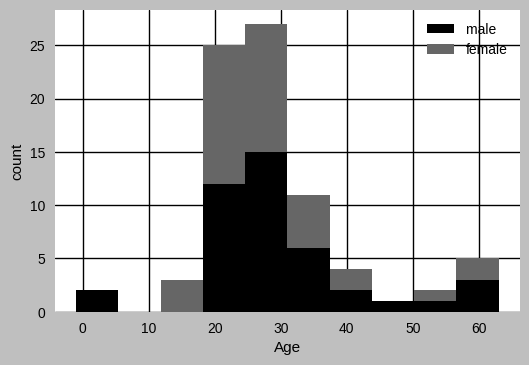

In [2]:
import scripts.data_loader as load
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 100  # image quality

# load subjects' gender and age from google cloud database
bucket = 'akoriweb_misc'
file = 'subject_info.json'
request = load.request_from_bucket(bucket, file)  # load subject info from my cloud database
data = request.json()
age = data['age']
ismale = data['ismale']

# separate two groups
female_ages = [x for index, x in enumerate(age) if ismale[index] == 0]
male_ages = [x for index, x in enumerate(age) if ismale[index] == 1]

plt.style.use("grayscale")  # some styles: grayscale, default, seaborn, dark_background, bmh
plt.hist([male_ages, female_ages], stacked=True, label=["male", "female"])
plt.legend()
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

<a id='heatmap'></a>
## Making a heatmap
First, we explore what subjects eye movement looks like with a heatmap visualization. Given a certain image, we'll make heatmap for all subjects, to achieve this we need a function that loads a subject from the dataset as a fixation map and then apply a gaussian filtered version on top of the webpage. To do this first we need `scripts/data_loader.py` to request subject data from the cloud database *(you can download full database from <a href="http://storage.googleapis.com/akoriweb_misc/dataset_json.7z" target="_blank">here</a>)*. Changing `map='priority'` allows us to make a priority heamap instead of a time heatmap, this may be relevant because what is seen first could not be what is seen for longer times.


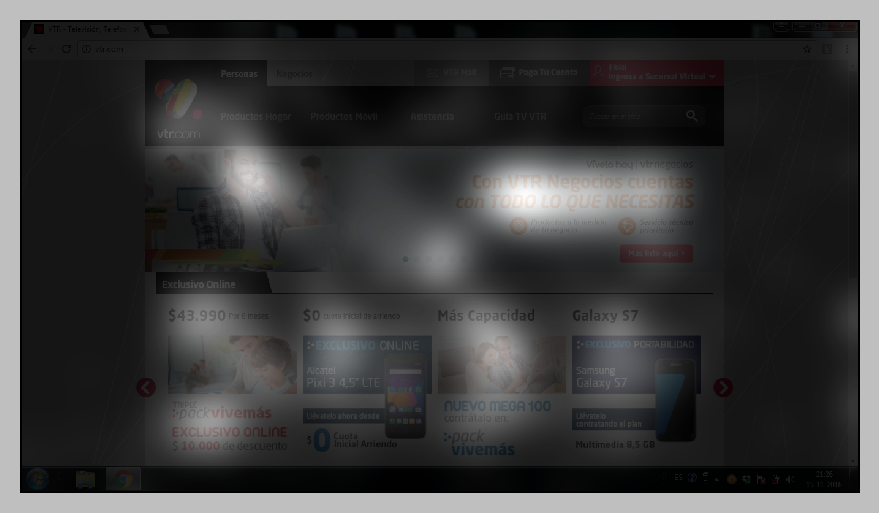

In [1]:
import scripts.data_loader as load
from scripts.qol import make_heatmap
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 180  # image quality

page = 'VTR'  # page name
number = 1  # page number
sigma = 30  # guassian parameter
ignored = 2  # ignore first n-fixations

# make a list of subjects: "sujeto1.json", "sujeto2.json", ..., etc
dataset_dir = ["sujeto"+str(num+1)+".json" for num in range(80)] 

# make the accumulated fixmap
total_fixmap, webpage = load.fixmap(dataset_dir, page, number, ignore=ignored, map='time', norm='norm')

# now make heatmap
heatmap = make_heatmap(total_fixmap, sigma)

# visualize results
plt.style.use("grayscale")
plt.figure()
plt.imshow(webpage)
plt.imshow(heatmap, alpha=0.9)
plt.tick_params(labelleft=False, labelbottom=False, bottom=False, left=False)
plt.show()

<a id='salience'></a>
## Computing Salience Map
The final achievement of this project is predicting user's ocular behaviour when exploring web-pages, to achieve the best possible result, we believe fusing the best performance algorithm's from the engineering field with the expertise in attentional mechanisms from neuroscience will achieve the best possible result. To prove this we start by using a pre-trained model with non-web database *TODO: agregar explicación del benchmark del MIT*, followed by a trained method of the same algorithm and a final optimization to the algorithm to specialize it to web-page environments. For each model we use NSS to quantify performance.

<a id='pretrained'></a>
### Pre-trained SAM-salience model vs All database
For a trained model we already computed results from *TODO: Cornia's model explanation* using pretrained SAM-resnet neural network, just to save time and processing power.


In [ ]:
from scripts.salience_metrics import nss
from scripts.qol import log_progress
from PIL import Image
import scripts.data_loader as load
import numpy as np
from bs4 import BeautifulSoup
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 100  # image quality


scores = []
ignored = 2  # ignore first n-fixations

# make a list of subjects: "sujeto1.json", "sujeto2.json", ..., etc
subject_set = ["sujeto"+str(num+1)+".json" for num in range(80)]

# make the list of pages from this directory
bucket = "akoriweb_pages"
request = load.request_from_bucket(bucket, '')
soup = BeautifulSoup(request.text, 'html.parser')
keys = soup.find_all('key')
page_set = [key.get_text() for key in keys]

print("processing {np} pages x {ns} subjects, this may take a while...".format(np=len(page_set), ns=len(subject_set)))
for a_page in log_progress(page_set, every=1): 
    # get page and number from path
    last = a_page.find('/')
    page = a_page[:last]  # page is until first '/'
    
    first = a_page.rfind(' ')
    last = a_page.rfind('.')
    number = int(a_page[first:last])  # num is between last space and '.jpg'
    
    # Make fixmap
    total_fixmap, webpage = load.fixmap(subject_set, page, number, ignore=ignored, map='time')
    
    # Load pre-trained salience from cloud
    image_id = "{page} {num}_salience.jpg".format(page=page, num=number)
    request = load.request_from_bucket('akoriweb_pretrained_sam', image_id)
    salmap = np.array(Image.open(BytesIO(request.content)))
    salmap_normalized = salmap/salmap.max()  # normalize saliency map

    # Compute score
    scores.append(nss(salmap_normalized, total_fixmap))
    
# make histogram of scores and mean value
plt.style.use("grayscale")  # some styles: grayscale, default, seaborn, dark_background, bmh
plt.hist(scores)
plt.title("Mean NSS-score = "+str(np.mean(scores)))
plt.xlabel("NSS")
plt.ylabel("count")
plt.show()

### Trained SAM-Salience model
*TODO*